# Question
### "How do the 'Value' data for different countries or regions compare? Are there noticeable differences or similarities?"
### Can we identify specific trends or patterns in the 'Value' data over the years?"



## Import statements


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_json('population_data.json')

# Display the DataFrame
df.head()


,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,96388069.0
1,Arab World,ARB,1961,98882541.4
2,Arab World,ARB,1962,101474075.8
3,Arab World,ARB,1963,104169209.2
4,Arab World,ARB,1964,106978104.6


## Convert 'Year' and 'Value' columns to numeric, handling errors by coercing non-numeric values to NaN

## Display the DataFrame after conversion



In [2]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Display the DataFrame
print(df)



      Country Name Country Code  Year        Value
0       Arab World          ARB  1960   96388069.0
1       Arab World          ARB  1961   98882541.4
2       Arab World          ARB  1962  101474075.8
3       Arab World          ARB  1963  104169209.2
4       Arab World          ARB  1964  106978104.6
...            ...          ...   ...          ...
12402     Zimbabwe          ZWE  2006   12529655.0
12403     Zimbabwe          ZWE  2007   12481245.0
12404     Zimbabwe          ZWE  2008   12451543.0
12405     Zimbabwe          ZWE  2009   12473992.0
12406     Zimbabwe          ZWE  2010   12571000.0

[12407 rows x 4 columns]



## Check for missing values in the DataFrame

## Handle missing values in the 'Value' column by filling with the mean


In [3]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill with mean, median, or drop rows/columns)
df['Value'].fillna(df['Value'].mean(), inplace=True)


Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64



## Check for duplicates in the DataFrame

## Remove duplicates from the DataFrame


In [4]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)


0


## Check the number of records in the DataFrame


In [5]:
# Check the number of records in each table or DataFrame
print("Number of records:", len(df))


Number of records: 12407


## Plot histograms for numerical columns

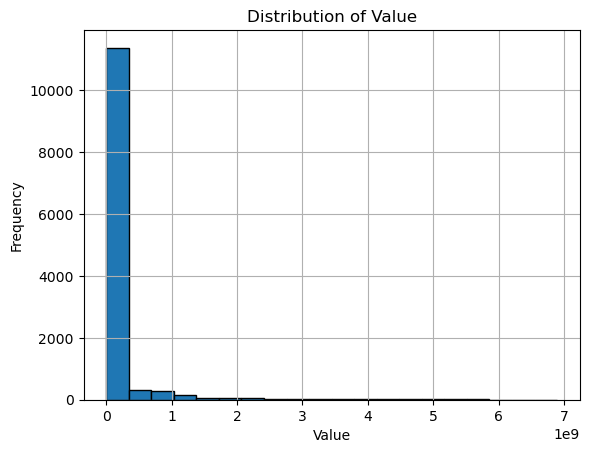

In [6]:

# Plot histograms for numerical columns
df['Value'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


## Create a scatter plot of 'Year' against 'Value'


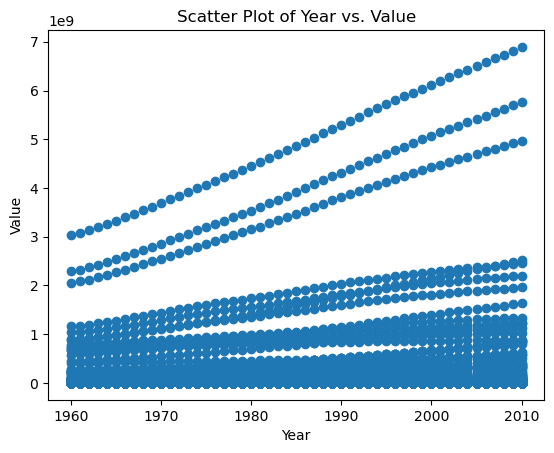

In [7]:
# Scatter plot to visualize relationship between two numerical columns
plt.scatter(df['Year'], df['Value'])
plt.title('Scatter Plot of Year vs. Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

## Select only numeric columns for the correlation matrix


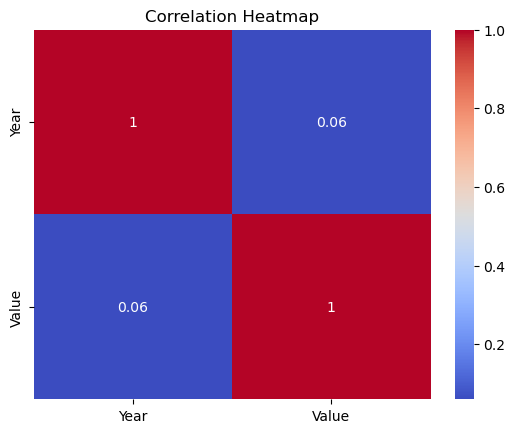

In [8]:


# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



## Calculate summary statistics for the DataFrame


In [9]:
# Display basic summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)


               Year         Value
count  12407.000000  1.240700e+04
mean    1985.088660  1.386537e+08
std       14.737612  5.402276e+08
min     1960.000000  4.279000e+03
25%     1972.000000  7.221950e+05
50%     1985.000000  5.139835e+06
75%     1998.000000  2.497234e+07
max     2010.000000  6.894595e+09


## Create a line plot of 'Year' against 'Value' with sum as the estimator


C:\Users\Student\AppData\Local\Temp\ipykernel_12308\3602735098.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Value', data=df, estimator='sum', ci=None)


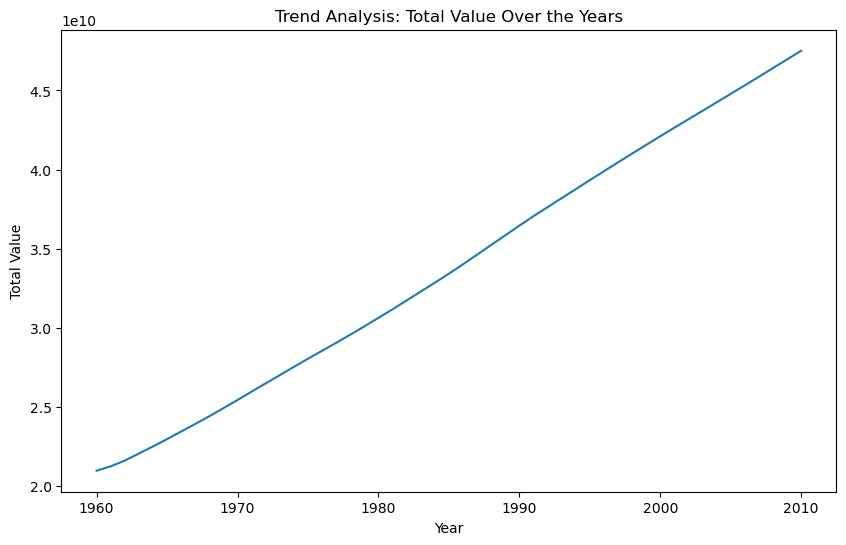

In [10]:

# 1. Trend Analysis (Line Plot)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=df, estimator='sum', ci=None)
plt.title('Trend Analysis: Total Value Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.show()


##  visualizing regions with average values exceeding a specified threshold using a bar plot.

C:\Users\Student\AppData\Local\Temp\ipykernel_12308\2563361911.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country Name', y='Value', data=high_value_regions, ci=None)


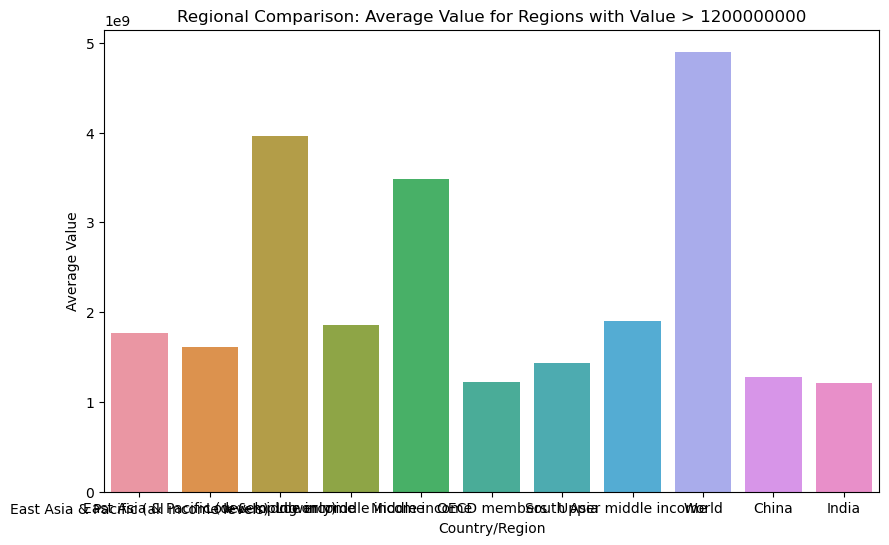

In [12]:

def plot_higher_value_regions(dataframe, threshold):
    # Filter regions with values higher than the threshold
    high_value_regions = dataframe[dataframe['Value'] > threshold]

    # Plotting the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Country Name', y='Value', data=high_value_regions, ci=None)
    plt.title('Regional Comparison: Average Value for Regions with Value > {}'.format(threshold))
    plt.xlabel('Country/Region')
    plt.ylabel('Average Value')
    plt.show()

# Example usage with a threshold of 100
plot_higher_value_regions(df, threshold=1200000000)

## Conclusions
### Population Increase Over the Years:

#### The data indicates a discernible increase in population over the years. The upward trend suggests a general growth in population, with the numerical values consistently rising as time progresses. This observation aligns with the expectation of global population growth.

### Population Distribution Across Regions:

#### The examination of the 'Value' data across different regions unveils substantial variations in population distribution. Noteworthy differences are apparent, indicating that certain regions experience higher or lower population densities compared to others. This diversity in population distribution may be attributed to regional factors such as geographical, economic, or sociocultural influences.
